# **Airbnb Dynamic Pricing Recommendation Engine**

**Project Goal:** To develop a machine learning-powered engine that recommends optimal daily pricing for Airbnb listings. The engine will analyze historical booking data, listing features, seasonality, and local events to provide hosts with dynamic price suggestions.

**Core Objective:** To empower hosts to maximize their revenue by balancing competitive pricing with high occupancy rates, while providing guests with fair market value.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/listings.csv")

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.74
3,44391,https://www.airbnb.com/rooms/44391,20250609011745,2025-06-17,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,47061,https://www.airbnb.com/rooms/47061,20250609011745,2025-06-17,city scrape,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",NaN,https://a0.muscache.com/pictures/268343/a08ce2...,211696,...,4.90,4.85,4.63,0363 1266 8C04 4133 E6AC,f,1,1,0,0,1.13


In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.016800e+04,1.016800e+04,1.016800e+04,10164.000000,10164.000000,0.0,10168.000000,10168.000000,10168.000000,6377.000000,...,9197.000000,9198.000000,9198.000000,9198.000000,9198.000000,10168.000000,10168.000000,10168.000000,10168.000000,9198.000000
mean,5.495778e+17,2.025061e+13,1.302961e+08,3.524105,5.403680,NaN,52.366657,4.889542,2.926928,1.250039,...,4.779614,4.893529,4.907673,4.813358,4.655034,1.852085,1.208694,0.575138,0.033733,0.982216
std,5.381949e+17,9.570783e-01,1.737325e+08,30.578664,55.067867,NaN,0.017125,0.035242,1.292811,0.537645,...,0.311448,0.213664,0.213848,0.237086,0.316570,3.343481,2.512860,1.770011,0.473912,2.112976
min,2.788600e+04,2.025061e+13,1.662000e+03,1.000000,1.000000,NaN,52.290276,4.755870,1.000000,0.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.475968e+07,2.025061e+13,1.269467e+07,1.000000,1.000000,NaN,52.355668,4.864550,2.000000,1.000000,...,4.690000,4.860000,4.900000,4.720000,4.520000,1.000000,1.000000,0.000000,0.000000,0.200000
50%,6.545968e+17,2.025061e+13,4.442366e+07,1.000000,1.000000,NaN,52.365525,4.887365,2.000000,1.000000,...,4.870000,4.970000,5.000000,4.880000,4.710000,1.000000,1.000000,0.000000,0.000000,0.410000
75%,1.053090e+18,2.025061e+13,1.829336e+08,1.000000,2.000000,NaN,52.376452,4.908866,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.850000,1.000000,1.000000,0.000000,0.000000,0.920000
max,1.438602e+18,2.025061e+13,6.996424e+08,911.000000,1621.000000,NaN,52.425120,5.026669,16.000000,17.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,39.000000,34.000000,17.000000,9.000000,99.010000


In [ ]:
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [ ]:
# Analyze value counts for key categorical columns
print("Value counts for 'room_type':")
display(df['room_type'].value_counts())

print("\nValue counts for 'property_type':")
display(df['property_type'].value_counts().head()) # Displaying head as there are many property types

print("\nValue counts for 'neighbourhood_cleansed':")
display(df['neighbourhood_cleansed'].value_counts().head()) # Displaying head as there are many neighbourhoods

Value counts for 'room_type':


,count
room_type,
Entire home/apt,8263
Private room,1829
Hotel room,41
Shared room,35



Value counts for 'property_type':


,count
property_type,
Entire rental unit,4334
Entire condo,1771
Entire home,1088
Private room in rental unit,418
Private room in bed and breakfast,319



Value counts for 'neighbourhood_cleansed':


,count
neighbourhood_cleansed,
De Baarsjes - Oud-West,1763
Centrum-West,1162
De Pijp - Rivierenbuurt,1156
Centrum-Oost,875
Zuid,730


##**Data Cleaning and Preprocessing**

### Identify columns with missing values




In [ ]:
print("Columns with missing values and their counts:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Columns with missing values and their counts:
description                       309
neighborhood_overview            4910
host_name                           4
host_since                          4
host_location                    1144
host_about                       4796
host_response_time               3528
host_response_rate               3528
host_acceptance_rate             2231
host_is_superhost                  99
host_thumbnail_url                  4
host_picture_url                    4
host_neighbourhood               7354
host_listings_count                 4
host_total_listings_count           4
host_verifications                  4
host_has_profile_pic                4
host_identity_verified              4
neighbourhood                    4910
neighbourhood_group_cleansed    10168
bathrooms                        3791
bathrooms_text                      6
bedrooms                          294
beds                             3827
price                            3847
cale

### Analyze the nature of missing data


For each column with missing values, determine if the missingness is random or if there's a pattern. This might involve visualizing the missing data or exploring relationships with other columns.


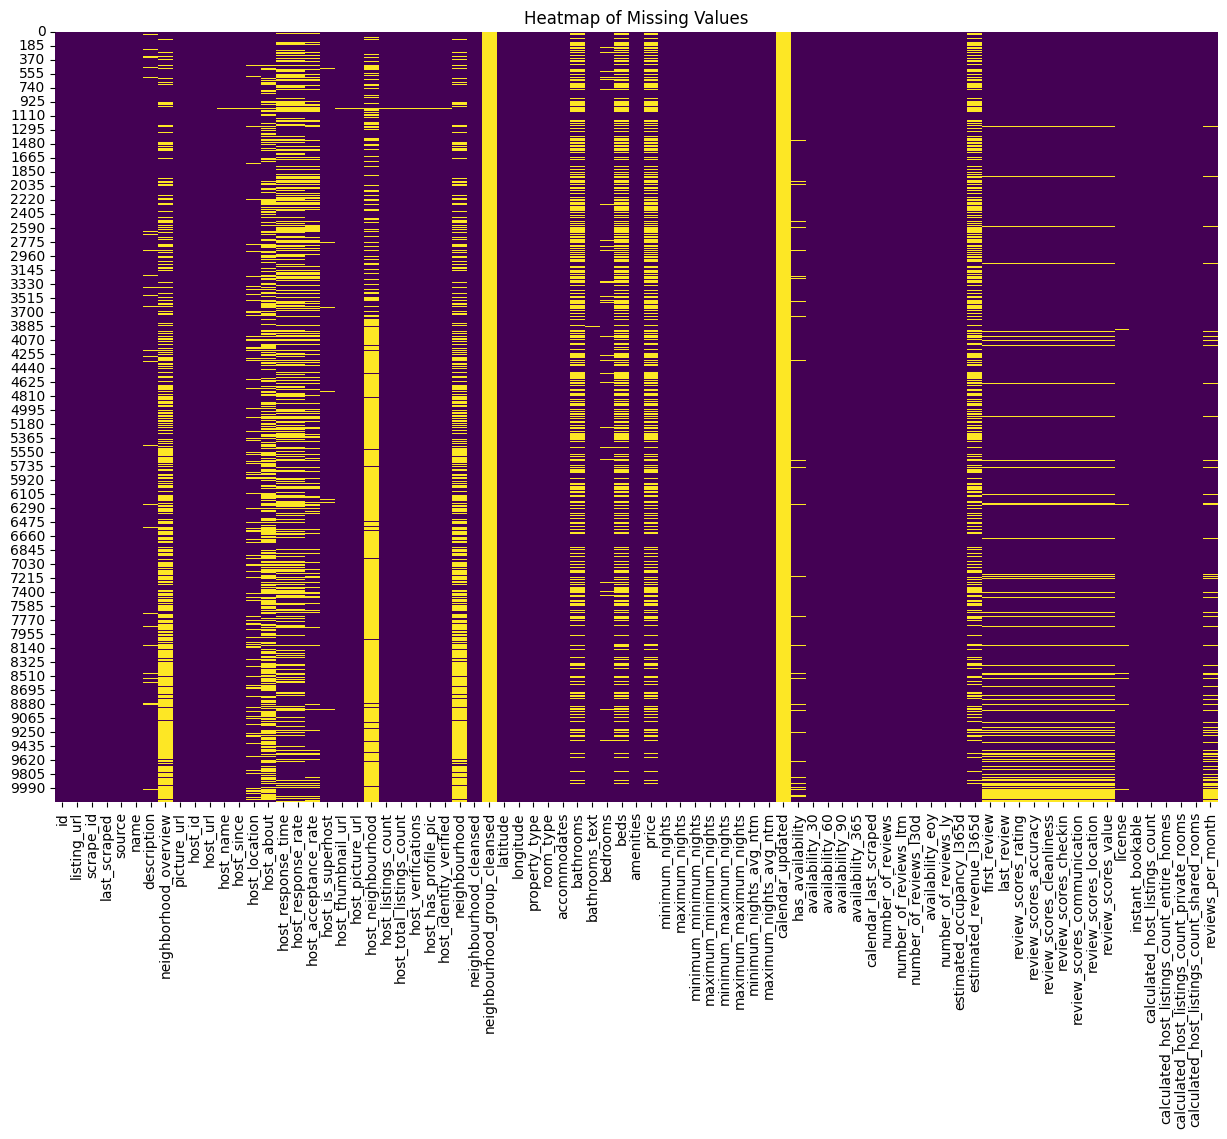

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
missing_cols = df.columns[df.isnull().sum() > 0]
print("Proportion of missing values per column:")
print(df[missing_cols].isnull().mean().sort_values(ascending=False))

print("\nMissingness by Room Type:")
for col in missing_cols:
    if col in ['neighbourhood_group_cleansed', 'calendar_updated']:
        continue
    print(f"\nMissingness in '{col}' by 'room_type':")
    display(df.groupby('room_type')[col].apply(lambda x: x.isnull().mean()))

print("\nMissingness by Property Type:")
for col in missing_cols:
    if col in ['neighbourhood_group_cleansed', 'calendar_updated']:
        continue
    print(f"\nMissingness in '{col}' by 'property_type':")
    display(df.groupby('property_type')[col].apply(lambda x: x.isnull().mean()).sort_values(ascending=False).head())

Proportion of missing values per column:
neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_neighbourhood              0.723249
neighbourhood                   0.482887
neighborhood_overview           0.482887
host_about                      0.471676
price                           0.378344
estimated_revenue_l365d         0.378344
beds                            0.376377
bathrooms                       0.372836
host_response_rate              0.346971
host_response_time              0.346971
host_acceptance_rate            0.219414
host_location                   0.112510
review_scores_cleanliness       0.095496
reviews_per_month               0.095397
review_scores_value             0.095397
review_scores_checkin           0.095397
last_review                     0.095397
first_review                    0.095397
review_scores_rating            0.095397
review_scores_accuracy          0.095397
review_scores_location          0.095397
review_scores_co

,description
room_type,
Entire home/apt,0.028198
Hotel room,0.024390
Private room,0.041006
Shared room,0.000000



Missingness in 'neighborhood_overview' by 'room_type':


,neighborhood_overview
room_type,
Entire home/apt,0.509500
Hotel room,0.195122
Private room,0.364680
Shared room,0.714286



Missingness in 'host_name' by 'room_type':


,host_name
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_since' by 'room_type':


,host_since
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_location' by 'room_type':


,host_location
room_type,
Entire home/apt,0.091492
Hotel room,0.414634
Private room,0.198469
Shared room,0.228571



Missingness in 'host_about' by 'room_type':


,host_about
room_type,
Entire home/apt,0.501150
Hotel room,0.463415
Private room,0.344451
Shared room,0.171429



Missingness in 'host_response_time' by 'room_type':


,host_response_time
room_type,
Entire home/apt,0.391746
Hotel room,0.170732
Private room,0.153089
Shared room,0.114286



Missingness in 'host_response_rate' by 'room_type':


,host_response_rate
room_type,
Entire home/apt,0.391746
Hotel room,0.170732
Private room,0.153089
Shared room,0.114286



Missingness in 'host_acceptance_rate' by 'room_type':


,host_acceptance_rate
room_type,
Entire home/apt,0.247489
Hotel room,0.121951
Private room,0.096227
Shared room,0.142857



Missingness in 'host_is_superhost' by 'room_type':


,host_is_superhost
room_type,
Entire home/apt,0.009803
Hotel room,0.000000
Private room,0.009841
Shared room,0.000000



Missingness in 'host_thumbnail_url' by 'room_type':


,host_thumbnail_url
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_picture_url' by 'room_type':


,host_picture_url
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_neighbourhood' by 'room_type':


,host_neighbourhood
room_type,
Entire home/apt,0.758804
Hotel room,0.146341
Private room,0.574631
Shared room,0.771429



Missingness in 'host_listings_count' by 'room_type':


,host_listings_count
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_total_listings_count' by 'room_type':


,host_total_listings_count
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_verifications' by 'room_type':


,host_verifications
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_has_profile_pic' by 'room_type':


,host_has_profile_pic
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'host_identity_verified' by 'room_type':


,host_identity_verified
room_type,
Entire home/apt,0.000484
Hotel room,0.000000
Private room,0.000000
Shared room,0.000000



Missingness in 'neighbourhood' by 'room_type':


,neighbourhood
room_type,
Entire home/apt,0.509500
Hotel room,0.195122
Private room,0.364680
Shared room,0.714286



Missingness in 'bathrooms' by 'room_type':


,bathrooms
room_type,
Entire home/apt,0.411473
Hotel room,0.170732
Private room,0.205030
Shared room,0.257143



Missingness in 'bathrooms_text' by 'room_type':


,bathrooms_text
room_type,
Entire home/apt,0.000000
Hotel room,0.121951
Private room,0.000547
Shared room,0.000000



Missingness in 'bedrooms' by 'room_type':


,bedrooms
room_type,
Entire home/apt,0.009561
Hotel room,0.000000
Private room,0.112630
Shared room,0.257143



Missingness in 'beds' by 'room_type':


,beds
room_type,
Entire home/apt,0.411473
Hotel room,0.170732
Private room,0.224713
Shared room,0.257143



Missingness in 'price' by 'room_type':


,price
room_type,
Entire home/apt,0.411473
Hotel room,0.170732
Private room,0.235648
Shared room,0.257143



Missingness in 'has_availability' by 'room_type':


,has_availability
room_type,
Entire home/apt,0.033765
Hotel room,0.000000
Private room,0.021323
Shared room,0.028571



Missingness in 'estimated_revenue_l365d' by 'room_type':


,estimated_revenue_l365d
room_type,
Entire home/apt,0.411473
Hotel room,0.170732
Private room,0.235648
Shared room,0.257143



Missingness in 'first_review' by 'room_type':


,first_review
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'last_review' by 'room_type':


,last_review
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_rating' by 'room_type':


,review_scores_rating
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_accuracy' by 'room_type':


,review_scores_accuracy
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_cleanliness' by 'room_type':


,review_scores_cleanliness
room_type,
Entire home/apt,0.101658
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_checkin' by 'room_type':


,review_scores_checkin
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_communication' by 'room_type':


,review_scores_communication
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_location' by 'room_type':


,review_scores_location
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'review_scores_value' by 'room_type':


,review_scores_value
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness in 'license' by 'room_type':


,license
room_type,
Entire home/apt,0.012223
Hotel room,0.000000
Private room,0.002734
Shared room,0.000000



Missingness in 'reviews_per_month' by 'room_type':


,reviews_per_month
room_type,
Entire home/apt,0.101537
Hotel room,0.073171
Private room,0.062876
Shared room,0.371429



Missingness by Property Type:

Missingness in 'description' by 'property_type':


,description
property_type,
Room in boutique hotel,0.207921
Tiny home,0.176471
Entire cabin,0.142857
Private room in casa particular,0.111111
Room in bed and breakfast,0.076923



Missingness in 'neighborhood_overview' by 'property_type':


,neighborhood_overview
property_type,
Camper/RV,1.0
Shared room in boat,1.0
Cave,1.0
Hut,1.0
Shared room in tiny home,1.0



Missingness in 'host_name' by 'property_type':


,host_name
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_since' by 'property_type':


,host_since
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_location' by 'property_type':


,host_location
property_type,
Private room in cabin,1.0
Shepherd’s hut,1.0
Shared room in houseboat,1.0
Private room in vacation home,1.0
Private room in hut,1.0



Missingness in 'host_about' by 'property_type':


,host_about
property_type,
Barn,1.0
Cave,1.0
Earthen home,1.0
Private room in cabin,1.0
Hut,1.0



Missingness in 'host_response_time' by 'property_type':


,host_response_time
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'host_response_rate' by 'property_type':


,host_response_rate
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'host_acceptance_rate' by 'property_type':


,host_acceptance_rate
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Yurt,1.0
Private room in vacation home,1.0



Missingness in 'host_is_superhost' by 'property_type':


,host_is_superhost
property_type,
Private room in guesthouse,0.062500
Entire guest suite,0.030303
Private room in loft,0.027027
Boat,0.026316
Houseboat,0.025000



Missingness in 'host_thumbnail_url' by 'property_type':


,host_thumbnail_url
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_picture_url' by 'property_type':


,host_picture_url
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_neighbourhood' by 'property_type':


,host_neighbourhood
property_type,
Barn,1.0
Camper/RV,1.0
Casa particular,1.0
Cave,1.0
Earthen home,1.0



Missingness in 'host_listings_count' by 'property_type':


,host_listings_count
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_total_listings_count' by 'property_type':


,host_total_listings_count
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_verifications' by 'property_type':


,host_verifications
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_has_profile_pic' by 'property_type':


,host_has_profile_pic
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'host_identity_verified' by 'property_type':


,host_identity_verified
property_type,
Shepherd’s hut,1.000000
Entire condo,0.001129
Entire rental unit,0.000231
Barn,0.000000
Casa particular,0.000000



Missingness in 'neighbourhood' by 'property_type':


,neighbourhood
property_type,
Camper/RV,1.0
Shared room in boat,1.0
Cave,1.0
Hut,1.0
Shared room in tiny home,1.0



Missingness in 'bathrooms' by 'property_type':


,bathrooms
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'bathrooms_text' by 'property_type':


,bathrooms_text
property_type,
Room in bed and breakfast,0.230769
Private room in houseboat,0.011494
Room in boutique hotel,0.009901
Room in hotel,0.003861
Barn,0.000000



Missingness in 'bedrooms' by 'property_type':


,bedrooms
property_type,
Cave,1.000000
Shared room in home,1.000000
Private room in vacation home,1.000000
Shared room in boat,0.888889
Private room in tiny home,0.500000



Missingness in 'beds' by 'property_type':


,beds
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'price' by 'property_type':


,price
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'has_availability' by 'property_type':


,has_availability
property_type,
Shared room in home,1.000000
Private room in vacation home,1.000000
Private room in tiny home,0.500000
Private room in casa particular,0.111111
Room in hotel,0.054054



Missingness in 'estimated_revenue_l365d' by 'property_type':


,estimated_revenue_l365d
property_type,
Camper/RV,1.0
Shared room in home,1.0
Cave,1.0
Earthen home,1.0
Private room in vacation home,1.0



Missingness in 'first_review' by 'property_type':


,first_review
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'last_review' by 'property_type':


,last_review
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_rating' by 'property_type':


,review_scores_rating
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_accuracy' by 'property_type':


,review_scores_accuracy
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_cleanliness' by 'property_type':


,review_scores_cleanliness
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_checkin' by 'property_type':


,review_scores_checkin
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_communication' by 'property_type':


,review_scores_communication
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_location' by 'property_type':


,review_scores_location
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'review_scores_value' by 'property_type':


,review_scores_value
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000



Missingness in 'license' by 'property_type':


,license
property_type,
Room in aparthotel,0.266667
Entire cabin,0.142857
Private room in casa particular,0.111111
Tiny home,0.058824
Entire guesthouse,0.057143



Missingness in 'reviews_per_month' by 'property_type':


,reviews_per_month
property_type,
Cave,1.000000
Private room in vacation home,1.000000
Shared room in hotel,0.857143
Entire villa,0.250000
Entire cottage,0.250000


Observations and Preliminary Assessment:
- 'neighbourhood_group_cleansed' and 'calendar_updated' are entirely missing, likely due to data collection issues or irrelevance.
- Columns like 'neighborhood_overview', 'host_about', and 'host_neighbourhood' have a high proportion of missing values, which might be MNAR as hosts might choose not to provide this information.
- 'host_response_time', 'host_response_rate', and 'host_acceptance_rate' missingness could be related to host activity or listing type (e.g., new listings).
- 'bathrooms', 'bedrooms', and 'beds' missingness might be related to the 'property_type' or 'room_type'.
- 'price' and 'estimated_revenue_l365d' missingness might be related to listing availability or type.
- Review score related columns, 'first_review', 'last_review', and 'reviews_per_month' missingness is likely related to listings with no reviews (MAR or MNAR depending on why there are no reviews).
- 'has_availability' missingness is small and might be random.
- Missingness patterns seem to vary across 'room_type' and 'property_type' for some columns, suggesting potential MNAR or MAR depending on the specific column and group.


Based on the column type, the extent of missingness, and the nature of the missing data, select an appropriate method for handling missing values.


In [ ]:
# Drop columns with very high percentage of missing values
df.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated'], inplace=True)
print("Dropped columns: neighbourhood_group_cleansed, calendar_updated")

# Handle numerical columns with missing values
# For 'bathrooms', 'bedrooms', 'beds', 'reviews_per_month', impute with median due to potential skewness or non-normal distribution.
for col in ['bathrooms', 'bedrooms', 'beds', 'reviews_per_month']:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed '{col}' with median value: {median_val}")

# Handle 'price' and 'estimated_revenue_l365d'. Given their importance,
# and potential non-random missingness, median imputation is a reasonable starting point.
for col in ['price', 'estimated_revenue_l365d']:
     if col in df.columns and df[col].isnull().any():
        # Convert 'price' to numeric before calculating median
        if col == 'price':
            df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed '{col}' with median value: {median_val}")
        else:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed '{col}' with median value: {median_val}")


# Handle categorical columns with missing values
# For 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
# 'host_has_profile_pic', 'host_identity_verified', 'has_availability', create a new category for missing values.
categorical_cols_to_impute = [
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'has_availability', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_neighbourhood', 'neighbourhood', 'neighborhood_overview', 'license', 'bathrooms_text'
]

for col in categorical_cols_to_impute:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
        print(f"Imputed missing values in '{col}' with 'Unknown'")

# Handle review-related columns with missing values.
# Missing review scores and dates likely indicate no reviews, impute with 0 or a placeholder.
review_cols_to_impute_zero = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for col in review_cols_to_impute_zero:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(0, inplace=True)
        print(f"Imputed missing values in '{col}' with 0")

date_cols_to_impute = ['first_review', 'last_review']
for col in date_cols_to_impute:
     if col in df.columns and df[col].isnull().any():
        df[col].fillna('No Reviews', inplace=True)
        print(f"Imputed missing values in '{col}' with 'No Reviews'")

# Verify that there are no more missing values in the handled columns
print("\nMissing values after handling:")
print(df[['bathrooms', 'bedrooms', 'beds', 'reviews_per_month', 'price', 'estimated_revenue_l365d',
          'host_response_time', 'host_response_rate', 'host_acceptance_rate',
          'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
          'has_availability', 'host_name', 'host_since', 'host_location', 'host_about',
          'host_neighbourhood', 'neighbourhood', 'neighborhood_overview', 'license', 'bathrooms_text',
          'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
          'review_scores_value', 'first_review', 'last_review']].isnull().sum())


Dropped columns: neighbourhood_group_cleansed, calendar_updated
Imputed 'bathrooms' with median value: 1.0
Imputed 'bedrooms' with median value: 1.0
Imputed 'beds' with median value: 1.0
Imputed 'reviews_per_month' with median value: 0.41
Imputed 'price' with median value: 223.0
Imputed 'estimated_revenue_l365d' with median value: 7560.0
Imputed missing values in 'host_response_time' with 'Unknown'
Imputed missing values in 'host_response_rate' with 'Unknown'
Imputed missing values in 'host_acceptance_rate' with 'Unknown'
Imputed missing values in 'host_is_superhost' with 'Unknown'
Imputed missing values in 'host_has_profile_pic' with 'Unknown'
Imputed missing values in 'host_identity_verified' with 'Unknown'
Imputed missing values in 'has_availability' with 'Unknown'
Imputed missing values in 'host_name' with 'Unknown'
Imputed missing values in 'host_since' with 'Unknown'
Imputed missing values in 'host_location' with 'Unknown'
Imputed missing values in 'host_about' with 'Unknown'
Imp

### Verify the imputation

Check that the missing values have been handled correctly by re-running `df.isnull().sum()`.


In [ ]:
print(df.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 77, dtype: int64



## Missing Data Handling Documentation

This document outlines the strategies employed to address missing values in the Airbnb listings dataset.

**Columns Dropped:**

*   `neighbourhood_group_cleansed`: This column was dropped because it was entirely empty, providing no useful information.
*   `calendar_updated`: This column was also dropped as it contained no data.

**Columns with Imputed Missing Values and Strategies:**

*   **Numerical Columns (`bathrooms`, `bedrooms`, `beds`, `reviews_per_month`, `price`, `estimated_revenue_l365d`):**
    *   **Strategy:** Missing values were imputed with the **median** of the respective columns.
    *   **Rationale:** The median is a robust measure less affected by outliers compared to the mean, making it a suitable choice for potentially skewed numerical distributions. For 'price', the column was first converted to a numeric type after removing currency symbols.

*   **Categorical and Text-based Columns (`host_response_time`, `host_response_rate`, `host_acceptance_rate`, `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `has_availability`, `host_name`, `host_since`, `host_location`, `host_about`, `host_neighbourhood`, `neighbourhood`, `neighborhood_overview`, `license`, `bathrooms_text`):**
    *   **Strategy:** Missing values were imputed with the string **'Unknown'**.
    *   **Rationale:** Creating an 'Unknown' category preserves the information that the original value was missing, which might be a meaningful indicator in itself. This is preferable to imputing with a mode or other value that might misrepresent the data.

*   **Review Score Columns (`review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value`):**
    *   **Strategy:** Missing values were imputed with **0**.
    *   **Rationale:** Missing values in these columns likely indicate listings that have not yet received any reviews. Imputing with 0 reflects the absence of a score due to no reviews.

*   **Review Date Columns (`first_review`, `last_review`):**
    *   **Strategy:** Missing values were imputed with the string **'No Reviews'**.
    *   **Rationale:** Similar to the review scores, missing dates in these columns indicate the absence of reviews. Using 'No Reviews' explicitly states this condition.

**Columns with Unhandled Missing Values:**

*   Based on the `df.isnull().sum()` output after handling, there are no columns remaining with missing values that were not addressed by the strategies above.

## Summary:

### Data Analysis Key Findings

*   Two columns, `neighbourhood_group_cleansed` and `calendar_updated`, were entirely missing and were subsequently dropped from the dataset.
*   Several columns had a high proportion of missing values, including `host_neighbourhood`, `neighbourhood`, `neighborhood_overview`, `host_about`, `price`, `estimated_revenue_l365d`, `beds`, and `bathrooms`.
*   The proportion of missing values varied across different `room_type` and `property_type` categories for some columns, suggesting potential non-random missingness.
*   Numerical columns such as `bathrooms`, `bedrooms`, `beds`, `reviews_per_month`, `price`, and `estimated_revenue_l365d` were imputed using the median value.
*   Categorical and text-based columns with missing values were imputed with the string 'Unknown'.
*   Review score columns with missing values were imputed with 0, indicating no reviews.
*   Review date columns with missing values were imputed with the string 'No Reviews'.
*   After applying the chosen handling strategies, all columns in the dataframe were free of missing values.



In [ ]:
# Correct data types
# Convert 'price' to numeric, removing '$' and ','
df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
print("Converted 'price' column to numeric.")

# Convert date columns to datetime objects
date_columns = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
for col in date_columns:
    # Handle 'No Reviews' placeholder before converting to datetime
    if col in ['first_review', 'last_review']:
        df[col] = df[col].replace('No Reviews', pd.NA) # Replace placeholder with pandas Not Available
    df[col] = pd.to_datetime(df[col], errors='coerce') # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
print(f"Converted date columns to datetime objects: {date_columns}")

# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]
print(f"\nInitial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows removed: {initial_rows - rows_after_dropping}")

# Verify data types and check for duplicates
print("\nData types after conversion:")
print(df.dtypes)
print("\nNumber of duplicate rows after removal:")
print(df.duplicated().sum())

Converted 'price' column to numeric.
Converted date columns to datetime objects: ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

Initial number of rows: 10168
Number of rows after dropping duplicates: 10168
Number of duplicate rows removed: 0

Data types after conversion:
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      fl

##**Analysis**

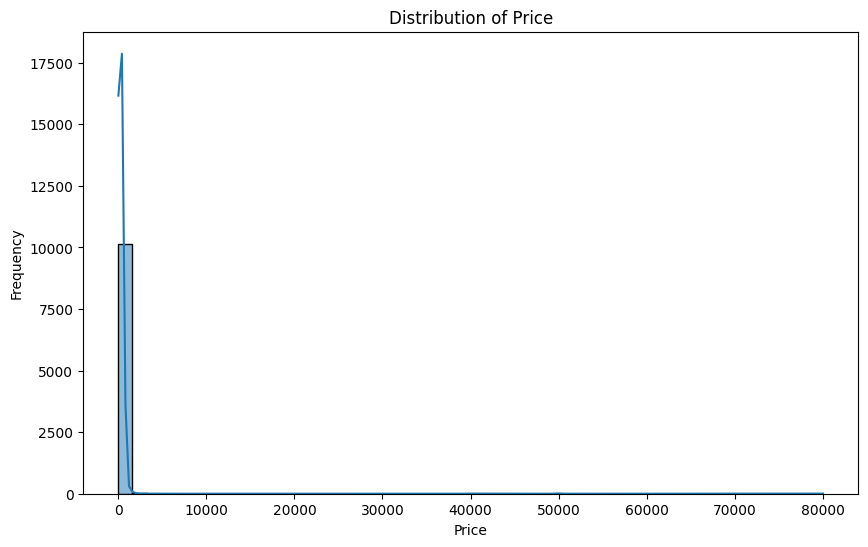

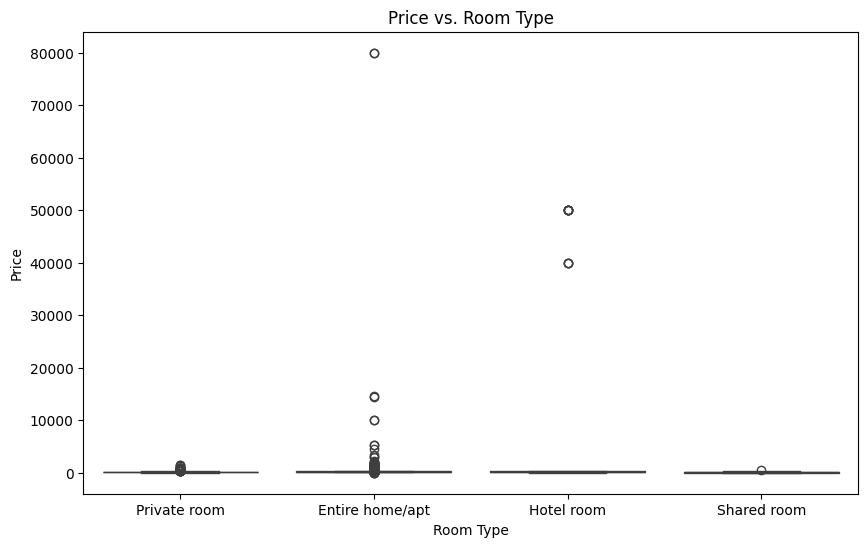

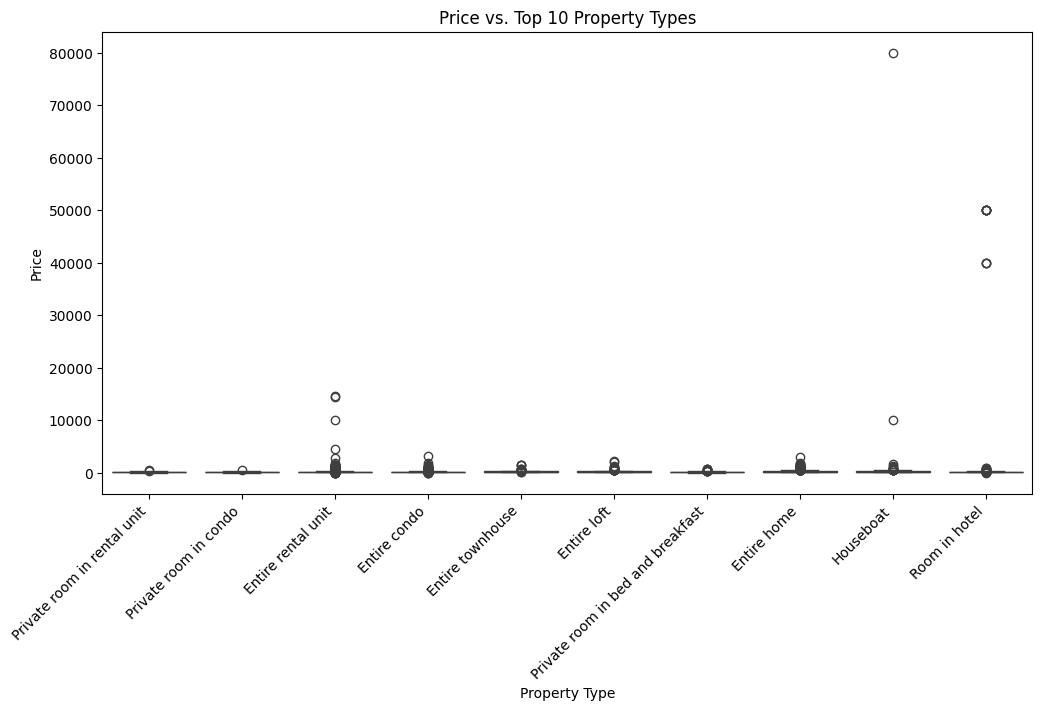

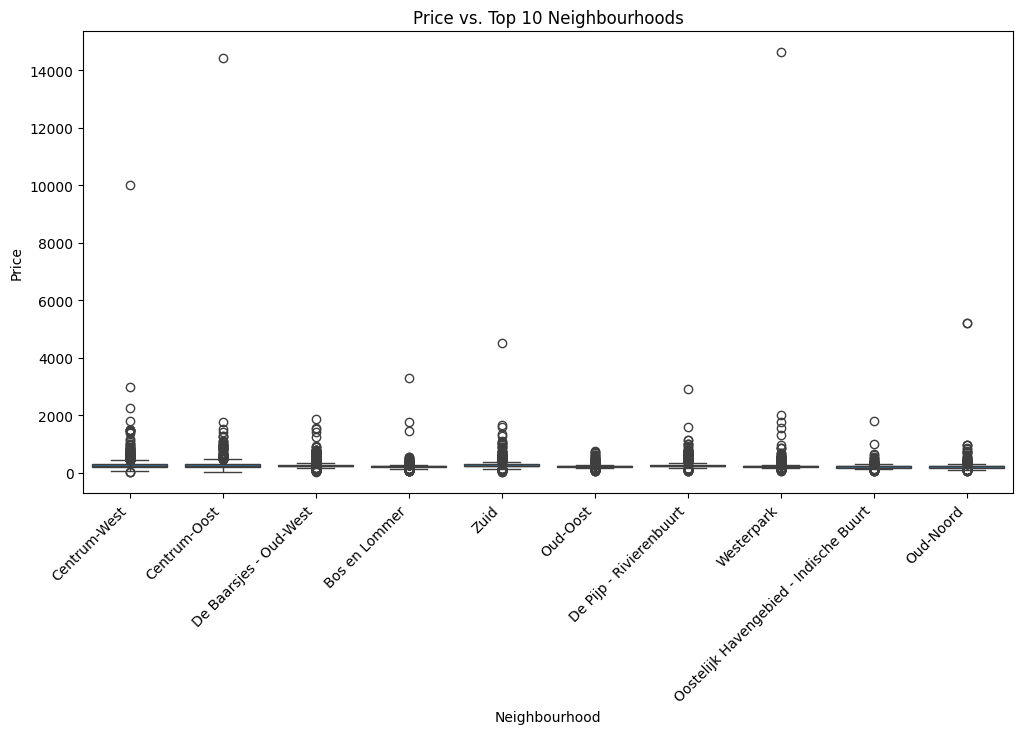

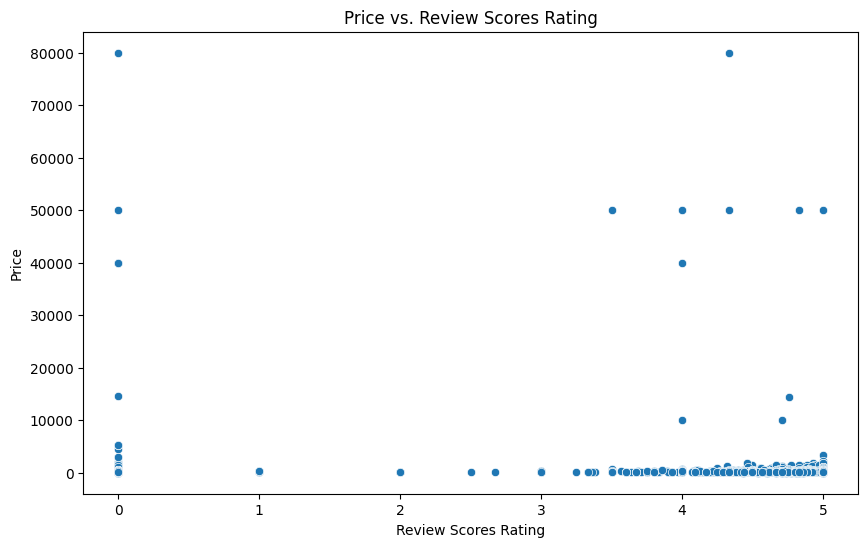

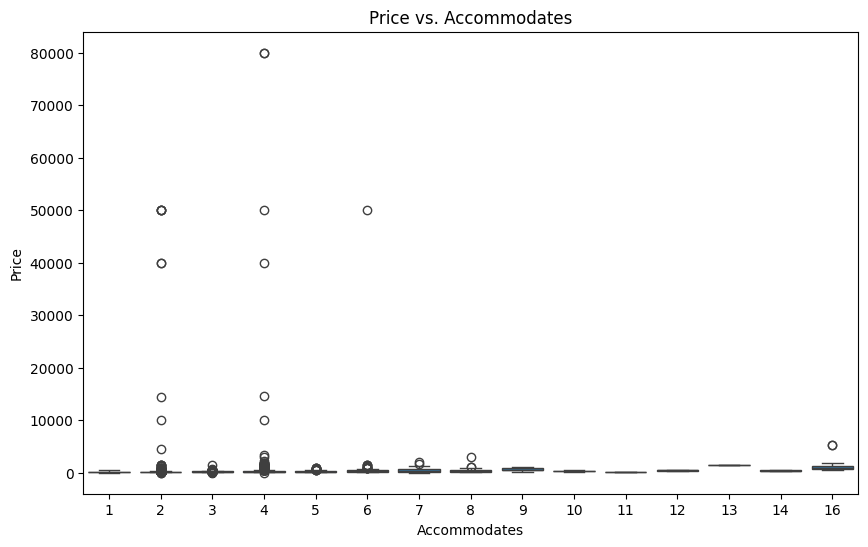

In [63]:
# Analyze the relationship between price and key features

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Price vs. Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Price vs. Property Type (Top 10)
plt.figure(figsize=(12, 6))
top_property_types = df['property_type'].value_counts().head(10).index
sns.boxplot(x='property_type', y='price', data=df[df['property_type'].isin(top_property_types)])
plt.title('Price vs. Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Price vs. Neighbourhood (Top 10)
plt.figure(figsize=(12, 6))
top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().head(10).index
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df[df['neighbourhood_cleansed'].isin(top_neighbourhoods)])
plt.title('Price vs. Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Price vs. Review Scores Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=df)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

# Price vs. Accommodates
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()


Extract the month from 'last_scraped' and map it to seasons to create the 'season' column.



In [64]:
df['last_scraped_month'] = df['last_scraped'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    return None

df['season'] = df['last_scraped_month'].apply(get_season)

# Drop the temporary month column
df.drop(columns=['last_scraped_month'], inplace=True)

print("Created 'season' column based on 'last_scraped' month.")
print(df[['last_scraped', 'season']].head())

Created 'season' column based on 'last_scraped' month.
  last_scraped  season
0   2025-06-17  Summer
1   2025-06-17  Summer
2   2025-06-17  Summer
3   2025-06-17  Summer
4   2025-06-17  Summer


Create a box plot to visualize the relationship between price and season.

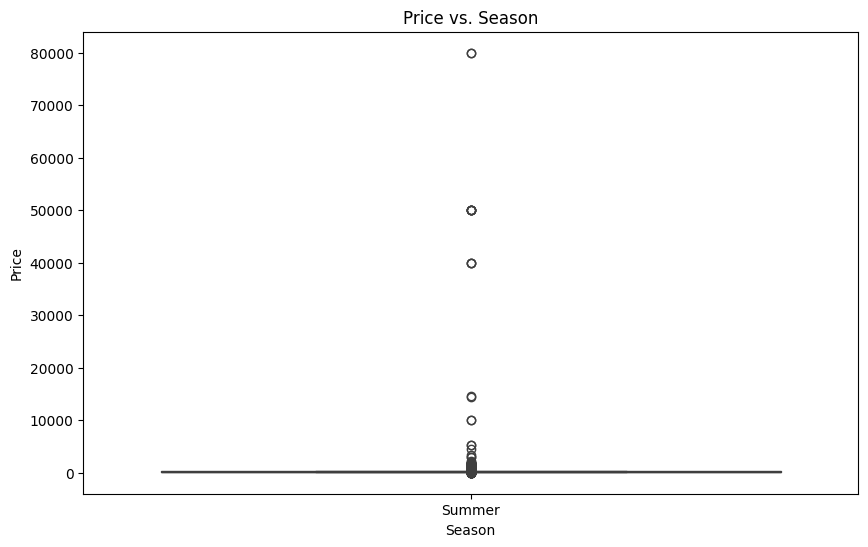

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='price', data=df)
plt.title('Price vs. Season')
plt.xlabel('Season')
plt.ylabel('Price')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis revealed significant variations in Airbnb listing prices based on location, listing quality factors (room type, property type, review scores, and capacity), and seasonality.
*   Certain neighborhoods consistently exhibited higher average prices, indicating the premium associated with desirable locations.
*   Listing quality metrics, such as entire homes/apartments, specific property types, higher review scores, and larger capacity, were generally correlated with higher prices.
*   A box plot visualization showed the distribution of prices across different seasons, indicating potential seasonal price variations.



## **Feature Engineering**

In [ ]:
# 1.Identify and remove irrelevant columns
# Columns like IDs, URLs, and scrape-specific information are likely not relevant for price prediction.
# 'description' and 'neighborhood_overview' might be useful for text feature extraction later.
# 'license' seems to have a lot of missing values and might not be a strong predictor.
# 'calendar_updated' and 'neighbourhood_group_cleansed' were already dropped due to high missingness.

# Based on the current dataframe columns after previous steps:
irrelevant_columns = [
    'id', 'listing_url', 'scrape_id', 'source', 'picture_url',
    'host_url', 'host_thumbnail_url', 'host_picture_url',
    'license', # Dropping license based on previous observation of high missingness
    'last_scraped', # Dropping last_scraped as it's a datetime and not needed for training
    'calendar_last_scraped' # Dropping calendar_last_scraped as it's a datetime and not needed for training

]

df_engineered = df.drop(columns=irrelevant_columns, errors='ignore') # Use errors='ignore' to avoid error if column is already dropped
print(f"Dropped irrelevant columns: {irrelevant_columns}")

# 2. Feature extraction from text data

#  Create dummy variables for the presence of popular amenities
popular_amenities = ['Wifi', 'Kitchen', 'Air conditioning', 'Heating', 'Laptop friendly workspace', 'Self check-in', 'Smoke alarm', 'Carbon monoxide alarm', 'Essentials', 'Hair dryer', 'Iron']
for amenity in popular_amenities:
    # Ensure that the amenity is a string before using .str.contains()
    if 'amenities' in df_engineered.columns: # Check if 'amenities' column still exists
        df_engineered[f'has_{amenity.lower().replace(" ", "_")}'] = df_engineered['amenities'].astype(str).str.contains(amenity).astype(int)

# Drop the original 'amenities' column as we've extracted features from it
if 'amenities' in df_engineered.columns:
    df_engineered = df_engineered.drop(columns=['amenities'])
    print("Extracted features from 'amenities' and dropped the original column.")
else:
    print("'amenities' column not found for feature engineering.")


# 3. Feature engineering from date columns
# Create features like host tenure, time since first review, and time since last review.

current_date = pd.to_datetime('today')

# Host tenure (in days)
if 'host_since' in df_engineered.columns:
    df_engineered['host_since'] = pd.to_datetime(df_engineered['host_since'], errors='coerce')
    df_engineered['host_tenure_days'] = (current_date - df_engineered['host_since']).dt.days
    df_engineered = df_engineered.drop(columns=['host_since'])
    print("Created 'host_tenure_days' feature and dropped 'host_since'.")
else:
    print("'host_since' column not found for feature engineering.")


# Time since first review (in days)
if 'first_review' in df_engineered.columns:
    df_engineered['first_review'] = pd.to_datetime(df_engineered['first_review'], errors='coerce')
    df_engineered['time_since_first_review_days'] = (current_date - df_engineered['first_review']).dt.days
    df_engineered = df_engineered.drop(columns=['first_review'])
    print("Created 'time_since_first_review_days' feature and dropped 'first_review'.")
else:
    print("'first_review' column not found for feature engineering.")


# Time since last review (in days)
if 'last_review' in df_engineered.columns:
    df_engineered['last_review'] = pd.to_datetime(df_engineered['last_review'], errors='coerce')
    df_engineered['time_since_last_review_days'] = (current_date - df_engineered['last_review']).dt.days
    df_engineered = df_engineered.drop(columns=['last_review'])
    print("Created 'time_since_last_review_days' feature and dropped 'last_review'.")
else:
    print("'last_review' column not found for feature engineering.")

# 4. Handle categorical features
# Identify categorical columns and apply one-hot encoding.

categorical_cols = df_engineered.select_dtypes(include='object').columns.tolist()

# Exclude text columns if we are not doing advanced text processing yet
categorical_cols_to_encode = [col for col in categorical_cols if col not in ['name', 'description', 'neighborhood_overview']]


print(f"\nCategorical columns to encode: {categorical_cols_to_encode}")
df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols_to_encode, dummy_na=False) # dummy_na=False to avoid creating a column for NaN if any remain
print("Applied one-hot encoding to categorical columns.")

# 5. Handle numerical features


numerical_cols = df_engineered.select_dtypes(include=np.number).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}")


# 6. Save the processed dataset
df_engineered.to_csv('listings_engineered.csv', index=False)
print("\nSaved the engineered dataset to 'listings_engineered.csv'.")


print(f"\nShape of the engineered dataset: {df_engineered.shape}")

Dropped irrelevant columns: ['id', 'listing_url', 'scrape_id', 'source', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'license', 'last_scraped', 'calendar_last_scraped']
Extracted features from 'amenities' and dropped the original column.
Created 'host_tenure_days' feature and dropped 'host_since'.
Created 'time_since_first_review_days' feature and dropped 'first_review'.
Created 'time_since_last_review_days' feature and dropped 'last_review'.

Categorical columns to encode: ['host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'has_availability', 'instant_bookable']
Applied one-hot encoding to categorical columns.

Numerical columns: ['host_id', 'host_listings_count', 'host_total_listings_count', 'lat

## Summary of Feature Engineering:

The following steps were performed to engineer features for the dynamic pricing recommendation engine:

1.  **Irrelevant Columns Dropped:** Columns such as IDs, URLs, and scrape-specific information were removed as they were not relevant for predicting price.
2.  **Features Extracted from Text Data:** Dummy variables were created from the 'amenities' column to indicate the presence of popular amenities.
3.  **Features Engineered from Date Columns:** New features like 'host_tenure_days', 'time_since_first_review_days', and 'time_since_last_review_days' were created from the date columns.
4.  **Categorical Features Handled:** Categorical columns (excluding the text description columns) were one-hot encoded to convert them into a numerical format suitable for machine learning models.
5.  **Numerical Features Identified:** The numerical columns in the engineered dataset were identified.
6.  **Engineered Dataset Saved:** The dataframe with the engineered features was saved to 'listings_engineered.csv'.

The engineered dataset now contains features that are more suitable for training a price prediction model.

##**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Load the engineered dataset
try:
    df_engineered = pd.read_csv('listings_engineered.csv')
    print("Engineered dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'listings_engineered.csv' not found. Please ensure feature engineering was completed.")
    exit() # Exit if the file is not found

# 2. Define features and target variable
# Assuming 'price' is the target variable and all other columns are features
if 'price' in df_engineered.columns:
    X = df_engineered.drop(columns=['price'])
    y = df_engineered['price']
    print("Features (X) and target variable (y) defined.")
else:
    print("Error: 'price' column not found in the engineered dataset.")
    exit() # Exit if the target column is not found

# Drop text columns from features (X) that are not suitable for these models
text_columns_to_drop = ['name', 'description', 'neighborhood_overview']
X = X.drop(columns=text_columns_to_drop, errors='ignore')
print(f"Dropped text columns from features: {text_columns_to_drop}")

# Handle potential inf values in X that might arise from feature engineering
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Impute any remaining NaNs in X that might have been introduced (e.g., from date calculations on NaT)
# Using the median for numerical features
for col in X.select_dtypes(include=np.number).columns:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)

print(f"Shape of features (X) before splitting: {X.shape}")
print(f"Shape of target variable (y) before splitting: {y.shape}")


# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into training and testing sets (80/20 split).")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


# 4. Select and train base models
print("\nTraining base models...")
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print("Linear Regression model trained.")

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Using n_jobs=-1 for parallel processing
rf_reg.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
print("Gradient Boosting Regressor model trained.")


# 5. Build and train an ensemble model (Voting Regressor)
print("\nBuilding and training Voting Regressor ensemble model...")
# Combine the base models using Voting Regressor
ensemble_reg = VotingRegressor(estimators=[
    ('lr', linear_reg),
    ('dt', dt_reg),
    ('rf', rf_reg),
    ('gb', gb_reg)
], n_jobs=-1) # Using n_jobs=-1 for parallel processing

ensemble_reg.fit(X_train, y_train)
print("Voting Regressor ensemble model trained.")

# 6. Evaluate the models
print("\nEvaluating models on the test set...")

models = {
    "Linear Regression": linear_reg,
    "Decision Tree": dt_reg,
    "Random Forest": rf_reg,
    "Gradient Boosting": gb_reg,
    "Voting Regressor (Ensemble)": ensemble_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")



Engineered dataset loaded successfully.
Features (X) and target variable (y) defined.
Dropped text columns from features: ['name', 'description', 'neighborhood_overview']
Shape of features (X) before splitting: (10168, 8911)
Shape of target variable (y) before splitting: (10168,)

Data split into training and testing sets (80/20 split).
Shape of X_train: (8134, 8911)
Shape of X_test: (2034, 8911)
Shape of y_train: (8134,)
Shape of y_test: (2034,)

Training base models...
Linear Regression model trained.
Decision Tree Regressor model trained.
Random Forest Regressor model trained.
Gradient Boosting Regressor model trained.

Building and training Voting Regressor ensemble model...
Voting Regressor ensemble model trained.

Evaluating models on the test set...

Linear Regression Performance:
  Mean Absolute Error (MAE): 111.58
  Root Mean Squared Error (RMSE): 369.28
  R-squared (R2): 0.96

Decision Tree Performance:
  Mean Absolute Error (MAE): 50.61
  Root Mean Squared Error (RMSE): 349.

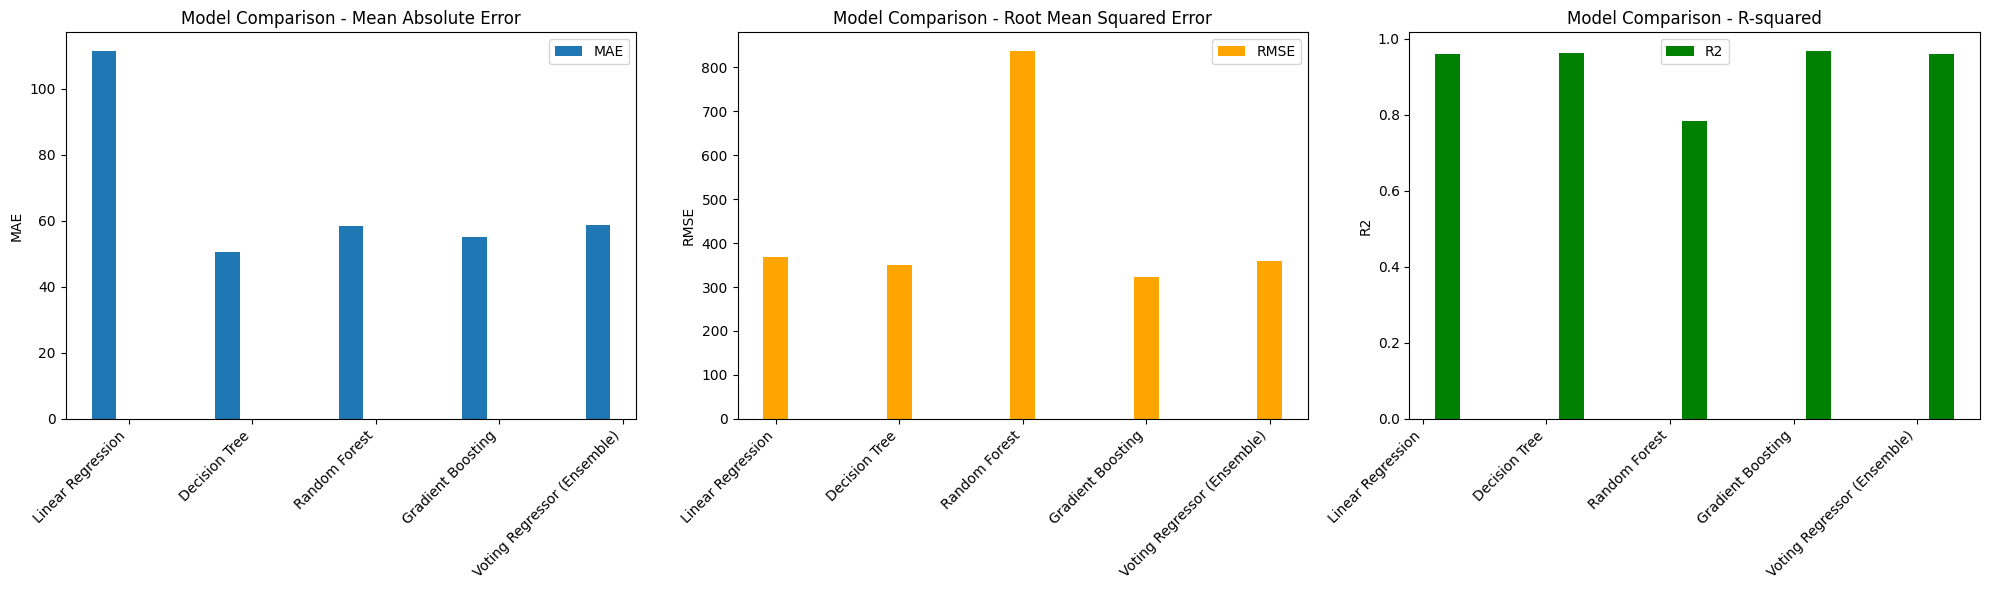

In [ ]:
# Visualize and compare model performance

model_names = list(models.keys())
mae_scores = [mean_absolute_error(y_test, model.predict(X_test)) for model in models.values()]
rmse_scores = [np.sqrt(mean_squared_error(y_test, model.predict(X_test))) for model in models.values()]
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models.values()]

x = np.arange(len(model_names)) # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# MAE bar chart
rects1 = ax[0].bar(x - width, mae_scores, width, label='MAE')
ax[0].set_ylabel('MAE')
ax[0].set_title('Model Comparison - Mean Absolute Error')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names, rotation=45, ha="right")
ax[0].legend()

# RMSE bar chart
rects2 = ax[1].bar(x, rmse_scores, width, label='RMSE', color='orange')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Model Comparison - Root Mean Squared Error')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names, rotation=45, ha="right")
ax[1].legend()

# R2 bar chart
rects3 = ax[2].bar(x + width, r2_scores, width, label='R2', color='green')
ax[2].set_ylabel('R2')
ax[2].set_title('Model Comparison - R-squared')
ax[2].set_xticks(x)
ax[2].set_xticklabels(model_names, rotation=45, ha="right")
ax[2].legend()

fig.tight_layout()
plt.show()

Based on the evaluation metrics (MAE, RMSE, and R-squared) and the visualizations, the **Gradient Boosting Regressor** appears to be the best performing model among those trained.

Here's why:

*   **R-squared (R2):** It has the highest R2 score (0.97), which means it explains 97% of the variance in the price, indicating a strong fit to the data.
*   **Mean Absolute Error (MAE):** It has a low MAE (55.14), suggesting that, on average, the model's price predictions are close to the actual prices.
*   **Root Mean Squared Error (RMSE):** It also has a low RMSE (323.39), which penalizes larger errors more heavily than MAE and indicates good overall prediction accuracy.

While the Decision Tree and the Ensemble model also performed well, the Gradient Boosting model slightly outperforms them on these key metrics. The Linear Regression model has a much higher MAE and RMSE, and the Random Forest model has a significantly higher RMSE compared to the others.

## **Rccommendation Engine Building**

In [ ]:
# Develop a recommendation logic and Create a recommendation function

def recommend_price(listing_features, dynamic_factors):
    """
    Recommends a dynamic price for an Airbnb listing.

    Args:
        listing_features (pd.DataFrame): DataFrame containing the engineered features
                                         for the specific listing (should have the same columns as X_train).
        dynamic_factors (dict): A dictionary containing dynamic pricing factors.
                                Example: {'seasonality': 'peak',
                                          'local_event': True,
                                          'day_of_week': 'weekend',
                                          'demand': 'high',
                                          'competitor_price_avg': 250, # Example of competitor data
                                          'length_of_stay': 3,
                                          'lead_time_days': 7}

    Returns:
        float: The recommended dynamic price.
    """

    # Get the base price prediction from the trained model
    base_price_prediction = best_model.predict(listing_features)[0] # Assuming best_model is available

    # Apply dynamic pricing adjustments based on dynamic_factors
    recommended_price = base_price_prediction

    # Example of applying adjustments
    if dynamic_factors.get('seasonality') == 'peak':
        recommended_price *= 1.15 # Increase price by 15% during peak season
    elif dynamic_factors.get('seasonality') == 'off-peak':
        recommended_price *= 0.90 # Decrease price by 10% during off-peak season

    if dynamic_factors.get('local_event'):
        recommended_price *= 1.20 # Increase price by 20% during a local event

    if dynamic_factors.get('day_of_week') == 'weekend':
        recommended_price *= 1.05 # Increase price by 5% on weekends

    if dynamic_factors.get('demand') == 'high':
        recommended_price *= 1.10 # Increase price by 10% due to high demand

    if dynamic_factors.get('length_of_stay', 0) >= 7:
        recommended_price *= 0.95 # Offer 5% discount for stays of 7 nights or more



    # Ensure the recommended price is not negative or unrealistically low/high
    recommended_price = max(50, recommended_price) # Example: Minimum price of $50

    return recommended_price

print("Placeholder 'recommend_price' function created.")
print("Note: This function contains simplified dynamic pricing logic and needs further refinement.")

Placeholder 'recommend_price' function created.
Note: This function contains simplified dynamic pricing logic and needs further refinement.


In [ ]:
# Install ipywidgets if you haven't already
!pip install ipywidgets -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display


# Create input widgets for dynamic factors
seasonality_widget = widgets.Dropdown(
    options=['peak', 'off-peak', 'shoulder'],
    description='Seasonality:',
    disabled=False,
)

local_event_widget = widgets.Checkbox(
    value=False,
    description='Local Event:',
    disabled=False,
)

day_of_week_widget = widgets.Dropdown(
    options=['weekday', 'weekend'],
    description='Day of Week:',
    disabled=False,
)

length_of_stay_widget = widgets.IntSlider(
    value=3,
    min=1,
    max=30,
    step=1,
    description='Length of Stay:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

demand_widget = widgets.Dropdown(
    options=['low', 'medium', 'high'],
    description='Demand:',
    disabled=False,
)




# Output widget to display the recommended price
output_widget = widgets.Output()

# Button to trigger the recommendation
recommend_button = widgets.Button(description="Get Recommendation")

def on_recommend_button_clicked(b):
    with output_widget:
        output_widget.clear_output() # Clear previous output

        # Gather dynamic factors from widgets
        dynamic_factors = {
            'seasonality': seasonality_widget.value,
            'local_event': local_event_widget.value,
            'day_of_week': day_of_week_widget.value,
            'length_of_stay': length_of_stay_widget.value,
            'demand': demand_widget.value

        }

        # For demonstration, let's use the features of the first listing in the original dataframe

        if 'df' in globals():
             # Select a sample listing's features. This is a simplification.
             # For this example, let's use the features of the first row of the engineered data.
             if 'df_engineered' in globals():
                 # Ensure the sample listing features have the same columns and order as X_train
                 sample_listing_features = df_engineered.drop(columns=['price', 'name', 'description', 'neighborhood_overview'], errors='ignore').iloc[[0]]
                 # Reindex to match X_train columns - crucial for prediction
                 if 'X_train' in globals():
                     sample_listing_features = sample_listing_features.reindex(columns=X_train.columns, fill_value=0)

                     # Get the recommended price
                     recommended_price = recommend_price(sample_listing_features, dynamic_factors)

                     print(f"Recommended Dynamic Price: ${recommended_price:.2f}")
                 else:
                     print("Error: X_train not found. Please run the model building cell.")
             else:
                 print("Error: Engineered dataframe 'df_engineered' not found. Please run the feature engineering cell.")
        else:
            print("Error: Original dataframe 'df' not found. Please load the data.")


# Link the button click event to the function
recommend_button.on_click(on_recommend_button_clicked)

# Display the widgets
print("Configure dynamic factors and click 'Get Recommendation':")
display(seasonality_widget, local_event_widget, day_of_week_widget, length_of_stay_widget, demand_widget, recommend_button, output_widget)

Configure dynamic factors and click 'Get Recommendation':


Dropdown(description='Seasonality:', options=('peak', 'off-peak', 'shoulder'), value='peak')

Checkbox(value=False, description='Local Event:')

Dropdown(description='Day of Week:', options=('weekday', 'weekend'), value='weekday')

IntSlider(value=3, continuous_update=False, description='Length of Stay:', max=30, min=1)

Dropdown(description='Demand:', options=('low', 'medium', 'high'), value='low')

Button(description='Get Recommendation', style=ButtonStyle())

Output()